<div class="alert alert-block alert-danger">
<H1>
IBM MACHINE LEARNING CERTIFICATION: SUPERVISED MACHINE LEARNING CLASSIFICATION MODELS
</H1></div>

<span style='color:Indigo'>**Course Link: https://www.coursera.org/learn/supervised-machine-learning-classification**</span>

<div class="alert alert-block alert-info">
<H2>
CLASSIFICATION MODELS FOR EMPLOYEE ATTRITION
</H2></div>

<div class="alert alert-block alert-success">
<H3>
Fatima, Sayeda
</H3></div>

<div class="alert alert-block alert-warning">
<H4>    
<span style='color:Indigo'> Import Libraries </span>
</H4></div>

In [1]:
## Import packages here
import warnings
import pandas as pd
import numpy as np 
import imblearn
import sweetviz as sv # For Automated Exploratory Data Analysis

from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.inspection import permutation_importance


from termcolor import colored     # To Display Colored Terminal Output

from datetime import date
from datetime import datetime


<div class="alert alert-block alert-danger">
<H4>
Get Script Start Time
</H4></div>

In [2]:
script_start_time = datetime.now()
print(script_start_time)

2022-08-17 15:38:56.117224


<div class="alert alert-block alert-success">
<H4>
3a) Data Exploration
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
Ignore Warnings & Random Seed Provision
</H4></div>

In [3]:
warnings.filterwarnings('ignore') # import warnings

In [4]:
rs = 123

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'>Load & Read Dataset</span>
</H4></div>

In [5]:
# Load the dataset
url = ("C:/Users/fatima.s/Documents/PythonScripts/DATA SCIENCE/IBM Machine Learning Intermediate/MODULE 3 SUPERVISED MACHINE LEARNING/DATA/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(url, index_col=False) # keep_default_na = False # na_filter=False,
df.head(100)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'>Check data set column types</span>
</H4></div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Perform quick EDA: </span>
    To see dataset’s distribution and its dispersion.
</H4></div>

In [7]:
df_eda = sv.analyze(df) # Use Sweetviz for Automated EDA
df_eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Compute Descriptive Statistics: </span>
    To summarize shape of a dataset’s distribution, its dispersion and central tendency.
</H4></div>

In [8]:
#To get description of all columns
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<div class="alert alert-block alert-success">
<H4>
3b) Data Cleansing Actions
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Drop Columns if 90% data is empty </span>
</H4></div>

drop_thresh = df.shape[0]*.10 <br>
df = df.loc[:, df.isin([' ','NULL','Nan',0]).mean() < drop_thresh] <br>
df = df.dropna(thresh=drop_thresh, how='all', axis='columns').copy() <br>
df.info()

In [9]:
print(df.isin([' ','NULL','NaN', 0]).mean())
drop_thresh = .90
df = df.loc[:, df.isin([' ','NULL', 'NaN',0]).mean() < drop_thresh]
print(df.isin([' ','NULL','NaN',0]).mean())

Age                         0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.134014
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
RelationshipSatisfaction    0.000000
StandardHours               0.000000
S

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Handle Missing Values: </span> Replace remaining ["None","nan", "NaN", ""] values with Zero
</H4></div>

In [10]:
df = df.replace(["None","nan", "NaN", ""], "0") # Replace all Nan Values with Zero
null = (df.isin(["None","nan", "NaN", ""]).sum()) # Sum as series
null_df=pd.DataFrame({'cols':null.index, 'sum':null.values}).sort_values(by=['sum'],ascending=False)# Convert series to list

print(colored("Data has ", 'green', attrs=['bold'])
      +colored((null_df.at[0,'sum']), 'red', attrs=['bold']) 
      +colored(" null values.\n ", 'green', attrs=['bold']) 
      +colored(null_df.tail(35), 'red', attrs=['bold'])) # print first two rows

Data has 0 null values.
                         cols  sum
0                        Age    0
26             StandardHours    0
20        NumCompaniesWorked    0
21                    Over18    0
22                  OverTime    0
23         PercentSalaryHike    0
24         PerformanceRating    0
25  RelationshipSatisfaction    0
27          StockOptionLevel    0
18             MonthlyIncome    0
28         TotalWorkingYears    0
29     TrainingTimesLastYear    0
30           WorkLifeBalance    0
31            YearsAtCompany    0
32        YearsInCurrentRole    0
33   YearsSinceLastPromotion    0
19               MonthlyRate    0
17             MaritalStatus    0
1                  Attrition    0
8              EmployeeCount    0
2             BusinessTravel    0
3                  DailyRate    0
4                 Department    0
5           DistanceFromHome    0
6                  Education    0
7             EducationField    0
9             EmployeeNumber    0
16           JobSatisfa

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Drop Duplicates </span>
</H4></div>

In [11]:
#Drop Duplicate Rows
df = df.drop_duplicates()

<div class="alert alert-block alert-success">
<H4>
4) Features Engineering
</H4></div>

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 1) Assessing Columns for Feature Selection: <br><br></span>
    Get unique counts to determine threshold for dropping columns <br>
    Drop Columns from dataframe if uniqueness is less than threshold (eg. 2)
</H4></div>

In [12]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns], # get unique counts
                          columns=['Column_Name', 'Unique']).sort_values(by=['Unique'])
print(colored("\nThis can help us determine threshold for which columns to exclude from Features.\n\n ", 'blue', attrs=['bold'])
      + colored(type(unique_counts), 'green', attrs=['bold'])
      + colored("\n\n", 'green', attrs=['bold'])
      + colored(unique_counts, 'red', attrs=['bold'])
     )

unique = unique_counts[(unique_counts['Unique'] < 2)] #If threshold is lesss than 2 then 
drop_unique = (unique['Column_Name'].tolist()) # list of columns to drop

cols_to_exclude = ['EmployeeNumber']
cols_to_exclude = ['EmployeeNumber'] + drop_unique

print(colored("\n\n ", 'blue', attrs=['bold'])
      + colored(type(unique), 'green', attrs=['bold'])
      + colored("\n", 'green', attrs=['bold'])
      + colored(unique, 'red', attrs=['bold'])
      
      + colored("\n\nList of columns to drop\n", 'blue', attrs=['bold'])
      + colored(cols_to_exclude , 'red', attrs=['bold'])
     )

#Function to Drop Columns & Convert to Categories
for col in df.columns:        
    if col in cols_to_exclude:
        df = df.loc[:, ~df.columns.isin(cols_to_exclude)]
df.info()


This can help us determine threshold for which columns to exclude from Features.

 <class 'pandas.core.frame.DataFrame'>

                 Column_Name  Unique
21                    Over18       1
26             StandardHours       1
8              EmployeeCount       1
11                    Gender       2
1                  Attrition       2
24         PerformanceRating       2
22                  OverTime       2
17             MaritalStatus       3
4                 Department       3
2             BusinessTravel       3
27          StockOptionLevel       4
10   EnvironmentSatisfaction       4
13            JobInvolvement       4
16           JobSatisfaction       4
25  RelationshipSatisfaction       4
30           WorkLifeBalance       4
6                  Education       5
14                  JobLevel       5
7             EducationField       6
29     TrainingTimesLastYear       7
15                   JobRole       9
20        NumCompaniesWorked      10
23         PercentSalaryHi

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 2) Data Encoding of Object/String Columns: </span> <br><br>
    * List all Object/String Columns <br>
    * Deep copy the original data <br>
    * Create Function to employ Scikit-learn label encoding to encode object data<br>
    * Create a new dataframe with encoded data description to attach to model outcomes
</H4></div>

In [13]:
#Function to encode object/string columns

#List all Object/String Columns
from sklearn import preprocessing
cat_columns = df.select_dtypes(include=[object]) # Get Object Type Columns to Convert to Encoded Categories 
#cat_columns.info()

categorical_column = list(cat_columns.columns)# list of columns to for label encoding

print(colored("\n\nColumns Requiring Encoding: \n", 'blue', attrs=['bold'])
              + colored(categorical_column, 'green', attrs=['bold']))

#Deep copy the original data
df_encoded = df.copy(deep=True)

# Make Empty Dataframe to decode encoded data later
decode_features = pd.DataFrame()

##### Employ Scikit-learn label encoding to encode object data #####
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        
        ##### Decode Encoded Data #####
        feature_df = pd.DataFrame([le_name_mapping])
        feature_df = feature_df.astype(str)
        print(feature_df)
        feature_df= (col + "_" + feature_df.iloc[0:])
        feature_df["Feature"] = col
        print(feature_df)
        decode_features = decode_features.append(feature_df)# Append Dictionaries to Empty Dataframe for later Decoding

        ##### Print Encoded Data #####
        print(colored("Feature: \n", 'blue', attrs=['bold'])
              + colored(col, 'red', attrs=['bold'])
              + colored("\nMapping: \n", 'blue', attrs=['bold'])
              + colored(le_name_mapping, 'green', attrs=['bold'])
              + colored("\n\n", 'blue', attrs=['bold'])
             )           
df_encoded.head(3)

##### Make Decoded Factor Dataframe with Description #####
#print(decode_features)
factor_list = decode_features.T # Transpose Dataframe and place in new dataframe
factor_list = factor_list.replace(np.nan, "/") # nan values with forward slash
factor_list["Factors"] = factor_list.astype(str).agg("".join,axis=1).replace(r'[^\w\s]|/', '', regex=True) # Aggregate All Columns so that all features scattered in multiple columns are copied into a single column and replace forward slash
factor_list.reset_index() # Reset index before copying/assigning it to a new column
factor_list['Description'] = factor_list.index  # Assign index to column
print(factor_list)



Columns Requiring Encoding: 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
  No Yes
0  0   1
            No          Yes    Feature
0  Attrition_0  Attrition_1  Attrition
Feature: 
Attrition
Mapping: 
{'No': 0, 'Yes': 1}


  Non-Travel Travel_Frequently Travel_Rarely
0          0                 1             2
         Non-Travel Travel_Frequently     Travel_Rarely         Feature
0  BusinessTravel_0  BusinessTravel_1  BusinessTravel_2  BusinessTravel
Feature: 
BusinessTravel
Mapping: 
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


  Human Resources Research & Development Sales
0               0                      1     2
  Human Resources Research & Development         Sales     Feature
0    Department_0           Department_1  Department_2  Department
Feature: 
Department
Mapping: 
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


  Human Resources Life Sciences Marketing Medical

<div class="alert alert-block alert-info">
<H3>
Pre-processing:  Feature selection/extraction
</H3></div>

<div class="alert alert-block alert-warning">
<H5>
Let's compute correlation to understand data features better:<br><br>
</H5></div>

In [14]:
from scipy.stats import pearsonr
#Supervised Filteration Technique using #Pearson's Correlation to filter positive correlations with target variable 'Attrition'
correlation_threshold = 0
target_col_name = 'Attrition'
feature_target_corr = {}
for col in df_encoded:
    if target_col_name != col:
        #feature_target_corr[col + ' to ' + target_col_name] = \
        feature_target_corr[col] = \
            pearsonr(df_encoded[col], df_encoded[target_col_name])[0]
correlation = pd.DataFrame(feature_target_corr.items(), columns=['Features1', 'Corr']).sort_values(by=['Corr'],ascending=False)
correlation = correlation.loc[correlation['Corr'] > correlation_threshold]

#Convert Positively Correlated Features to list
features1 = list(correlation.Features1.unique())


print(colored("\n\nPositive Correlations between Individual Features and Target Variable\n", 'blue', attrs=['bold'])
      + colored(correlation, 'red', attrs=['bold'])
      + colored("\n\nList of Features with Positive Correlations with Target Variable \n", 'blue', attrs=['bold'])
      + colored(features1, 'green', attrs=['bold'])
     )



Positive Correlations between Individual Features and Target Variable
             Features1      Corr
18            OverTime  0.246118
14       MaritalStatus  0.162070
4     DistanceFromHome  0.077924
12             JobRole  0.067151
3           Department  0.063991
17  NumCompaniesWorked  0.043494
8               Gender  0.029453
6       EducationField  0.026846
16         MonthlyRate  0.015170
20   PerformanceRating  0.002889
1       BusinessTravel  0.000074

List of Features with Positive Correlations with Target Variable 
['OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole', 'Department', 'NumCompaniesWorked', 'Gender', 'EducationField', 'MonthlyRate', 'PerformanceRating', 'BusinessTravel']


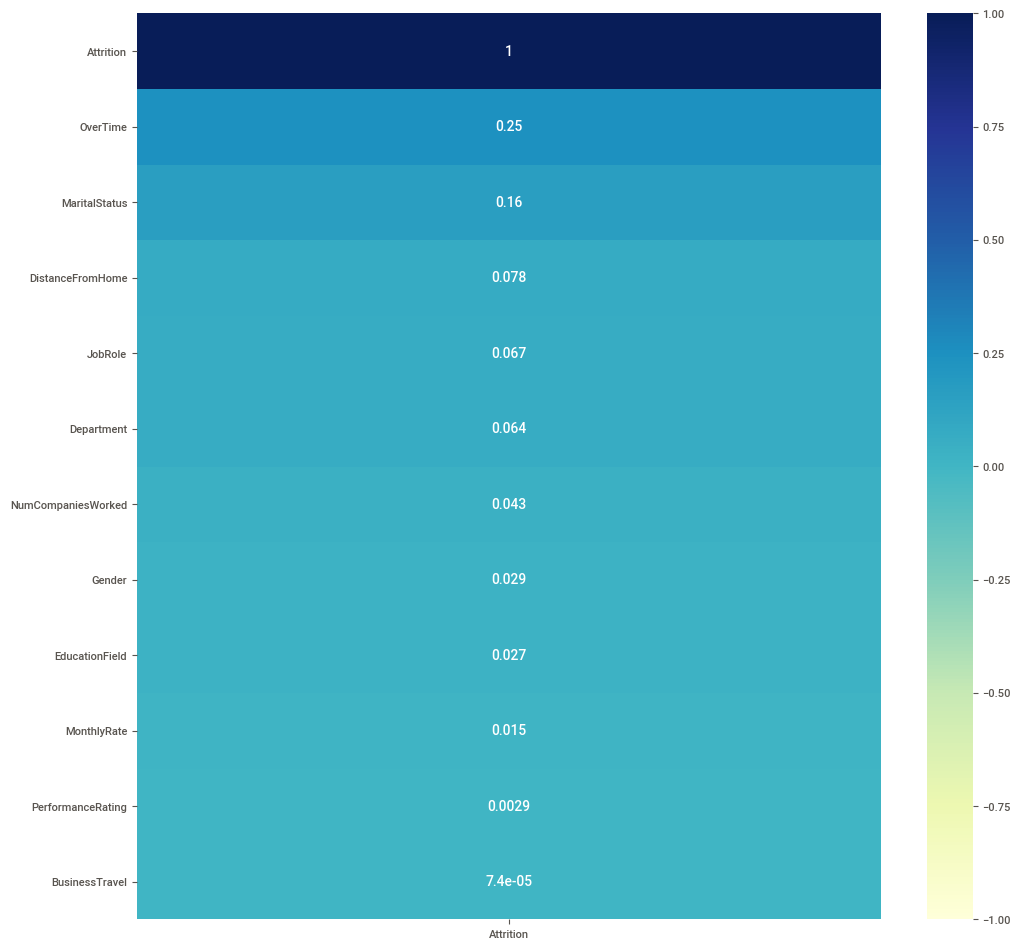

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_encoded.corr()[['Attrition']].sort_values('Attrition').tail(12),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

<div class="alert alert-block alert-warning">
<H5>
Final Feature Selection based on correlation threshold and previous 'features1' list
</H5></div>

In [16]:
#Code Source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
top_n = 30
correlation_threshold = 0.60

def get_feature_correlation(df_encoded, top_n=top_n, corr_method='pearson',
                            remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df_encoded.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Features2', 'Features3', 'Correlation_abs']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

#print(get_feature_correlation(df_encoded, 20))
corr = ((get_feature_correlation(df_encoded)))
corr = corr.loc[corr['Correlation_abs'] > correlation_threshold]


features2 = list(corr.Features2.unique())
features3 = list(corr.Features3.unique())
target = ['Attrition']

final_features = np.unique(target + features1 + features2 + features3)

print(colored("\n\nCorrelation Matrix Results for Feature Pairs\n", 'blue', attrs=['bold'])
      + colored(corr, 'red', attrs=['bold'])
      + colored("\n\nList of Final Features \n", 'blue', attrs=['bold'])
      + colored(final_features, 'green', attrs=['bold'])
     )



Correlation Matrix Results for Feature Pairs
               Features2                Features3  Correlation_abs
31         MonthlyIncome                 JobLevel         0.950300
33     TotalWorkingYears                 JobLevel         0.782208
35     PerformanceRating        PercentSalaryHike         0.773550
37     TotalWorkingYears            MonthlyIncome         0.772893
39  YearsWithCurrManager           YearsAtCompany         0.769212
41        YearsAtCompany       YearsInCurrentRole         0.758754
43  YearsWithCurrManager       YearsInCurrentRole         0.714365
45                   Age        TotalWorkingYears         0.680381
47      StockOptionLevel            MaritalStatus         0.662577
49               JobRole               Department         0.662431
51     TotalWorkingYears           YearsAtCompany         0.628133
53        YearsAtCompany  YearsSinceLastPromotion         0.618409

List of Final Features 
['Age' 'Attrition' 'BusinessTravel' 'Department' 'Distanc

In [17]:
df_encoded = df_encoded.filter(final_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   BusinessTravel           1470 non-null   int32
 3   Department               1470 non-null   int32
 4   DistanceFromHome         1470 non-null   int64
 5   EducationField           1470 non-null   int32
 6   Gender                   1470 non-null   int32
 7   JobLevel                 1470 non-null   int64
 8   JobRole                  1470 non-null   int32
 9   MaritalStatus            1470 non-null   int32
 10  MonthlyIncome            1470 non-null   int64
 11  MonthlyRate              1470 non-null   int64
 12  NumCompaniesWorked       1470 non-null   int64
 13  OverTime                 1470 non-null   int32
 14  PercentSalaryHike        1470 non-null   int64
 15  Perf

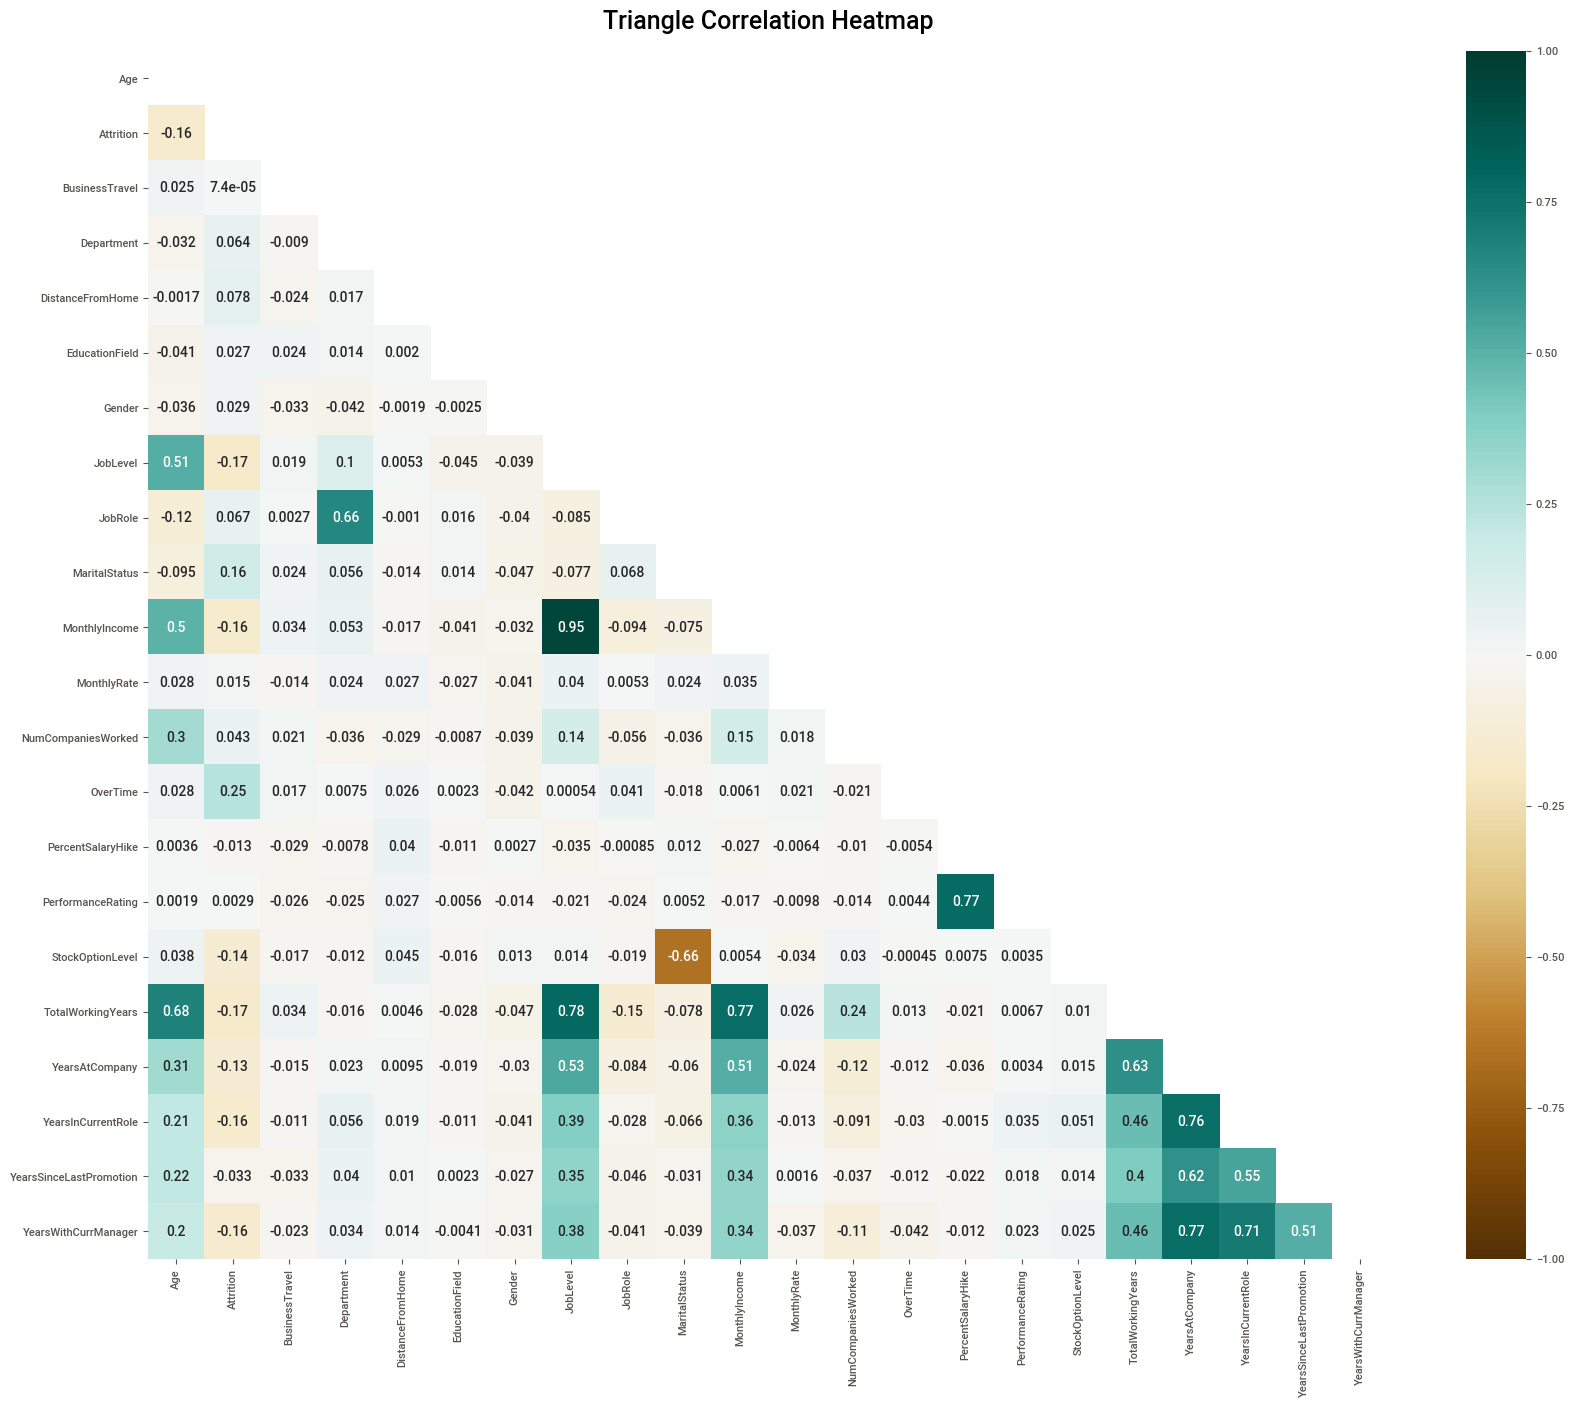

In [18]:
np.triu(np.ones_like(df_encoded.corr()))
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_encoded.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


<AxesSubplot:>

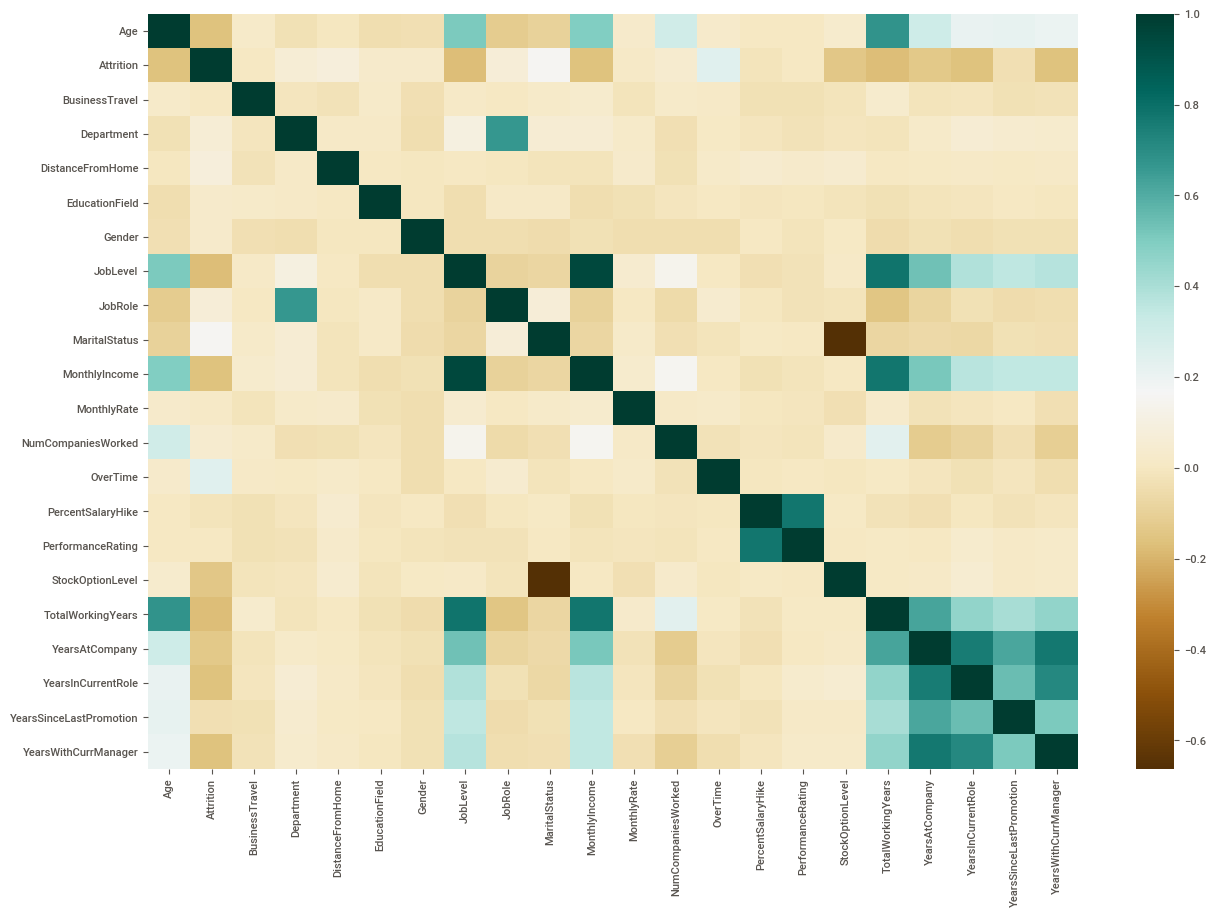

In [19]:
import seaborn as sns
data_correlation = df_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns,cmap='BrBG')

<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Perform quick EDA on Encoded Data: </span>
    To see final features distribution and dispersion.
</H4></div>

In [20]:
# read dataset
df_encoded_eda = sv.analyze(df_encoded)
df_encoded_eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-block alert-warning">
<H4>
    
<span style='color:Indigo'> Manage Encoded Data to get Sub-Factors/Features: </span>
    To see final features distribution and dispersion.
</H4></div>

<AxesSubplot:>

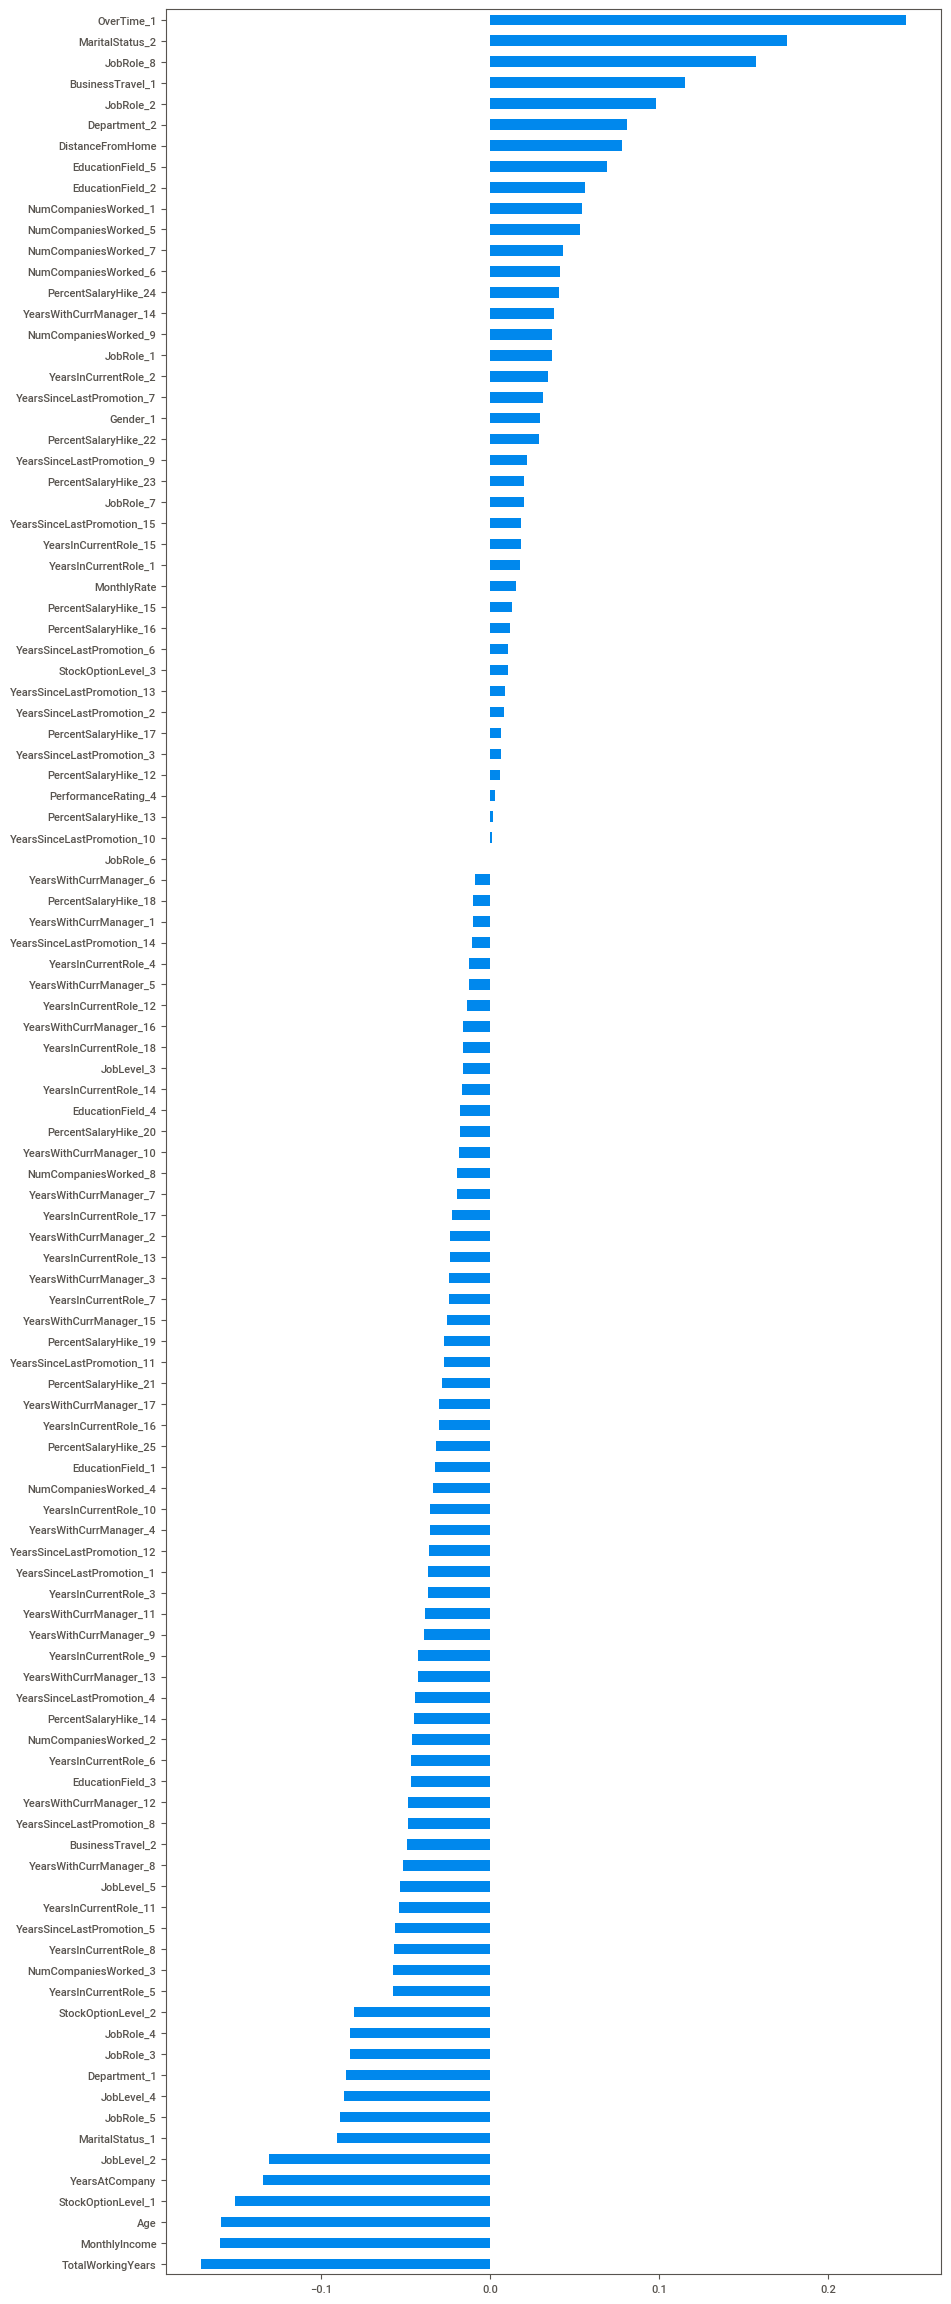

In [21]:
# Transform categorical data into dummies
dummy_col = [column for column in df_encoded.drop('Attrition', axis=1).columns if df_encoded[column].nunique() <20]
df_encoded = pd.get_dummies(df_encoded, columns=dummy_col, drop_first=True, dtype='uint8')
df_encoded.drop('Attrition', axis=1).corrwith(df_encoded.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Check Class Distribution for Preductive 'y' Variable: </span>
</H4></div>

In [22]:
s= df_encoded['Attrition'].value_counts()/df_encoded['Attrition'].count()*100
s = s.sort_values(ascending=False) # High to Low
s= s.to_frame('%')
s = s.round(2)
s['Attrition'] = s.index
print(colored("\n\nAttrition %age Distribution \n\n", 'blue', attrs=['bold'])
      + colored(s, 'red', attrs=['bold'])
      + colored("\n\nValue Counts show a highly imbalanced Class Distribution with ", 'green', attrs=['bold'])
      + colored(s['%'].iloc[0], 'red', attrs=['bold'])
      + colored(" in class ", 'blue', attrs=['bold'])
      + colored(s['Attrition'].iloc[0], 'red', attrs=['bold'])
      + colored("\n\nPlotting Attrition %age Distribution", 'blue', attrs=['bold'])
     )

#df_encoded['Attrition'].value_counts().plot.bar(color=['blue', 'red'])



Attrition %age Distribution 

       %  Attrition
0  83.88          0
1  16.12          1

Value Counts show a highly imbalanced Class Distribution with 83.88 in class 0

Plotting Attrition %age Distribution


<div class="alert alert-block alert-success">
<H4>
Provide Method to 'Split Training and Testing Dataset'
</H4></div>

In [23]:
def split_data(df_encoded):
    X = df_encoded.loc[ : , df_encoded.columns != 'Attrition']
    y = df_encoded['Attrition'].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Split Data into Test & Train Set: </span>
</H4></div>

In [24]:
X_train, X_test, y_train, y_test = split_data(df_encoded) # Call the Method to Split Training and Testing Dataset

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> Re-check Class Distribution on Train Set: </span>
</H4></div>

<AxesSubplot:>

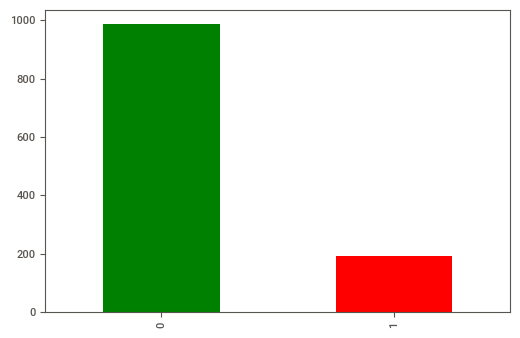

In [25]:
#hr_df['Class'].value_counts()
# Visualize the count for each class
y_train.value_counts().plot.bar(color=['green', 'red'], figsize=(6, 4))

<span style='color:blue'>**As we can see from the bar chart above, the non-attrition/churn employees are almost 5 times more than the churn employees, which makes dataset imbalanced. <br>
Since this dataset has numerous features, it would be better to use a more complex classification models. <br>
However, before applying complex models, we will start from Logistic Regression.<br>
We will then proceed with `RandomForestClassifier` from `sklearn` package.**</span>

<div class="alert alert-block alert-success">
<H4>
Split Data into X and y for capturing Feature Importance
</H4></div>

In [26]:
X = df_encoded.loc[ : , df_encoded.columns != 'Attrition']
y = df_encoded['Attrition'].astype('int')

<div class="alert alert-block alert-success">
<H4>
Method to 'Capture Feature Importance' <br>
{All models except Logistic Regression(LR) since LR does not have an attribute for ranking features}
</H4></div>


In [27]:
def feature_importance(df_encoded, model):
    fi = pd.DataFrame()
    fi["Factors"] = df_encoded.columns
    fi["Importance"] = model.feature_importances_
    return fi.sort_values(by="Importance", ascending=True)

<div class="alert alert-block alert-success">
<H4>
Method to 'Evaluate Model Results'
</H4></div>

In [28]:
def evaluate(y_test, preds, eval_type=""):
    results= {}
    results['type'] = eval_type
    # Accuracy
    results['accuracy'] = accuracy_score(y_test, preds)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
    results['recall'] = recall
    # Precision
    results['precision'] = precision
    # Fscore
    results['fscore'] = f_beta
    # AUC
    results['auc'] = roc_auc_score(y_test, preds)
    return results

<div class="alert alert-block alert-danger">
<H2>   
Logistic Regression (LR) Models
</H2></div>

<div class="alert alert-block alert-success">
<H4>
Grid Search Method to Find 'Best Parameters'to 'Build Logistic Regression WITH Best Class Weights'
</H4></div>

In [29]:
# Grid Search Method to find Best Hyperparameters for a Logistic Regression Model
def grid_search_lr(X_train, y_train):
    # Parameters
    params_grid = {
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}],
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
    }
    # LR Model
    lr_model = LogisticRegression(random_state=rs, max_iter=1000)
    
    # Search Best Parameters
    grid_search = GridSearchCV(estimator = lr_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    # Train Model with Best Parameters
    grid_search.fit(X_train, y_train)
    
    # Get Best/optimal parameters
    best_lrparams = grid_search.best_params_
    return best_lrparams

<div class="alert alert-block alert-warning">
<H4>
Get Optimal Parameters for LR Model using Grid Search LR Method above
</H4></div>

In [30]:
final_lrprams = grid_search_lr(X_train, y_train) # From the cell above, Call grid_search_rf(X_train, y_train)

final_lrprams_df = pd.DataFrame([final_lrprams]) # Dictionary To dataframe
print(final_lrprams_df)

# Make Optimal Variables
optimal_lr_class_weight = (final_lrprams_df.at[0,'class_weight'])
optimal_solver = (final_lrprams_df.at[0,'solver'])
print('Optimal LR Class Weights: ', optimal_lr_class_weight)
print('Optimal Solver: ', optimal_solver)

# Define Optimal Parameters
optimal_lr_params = {'class_weight': optimal_lr_class_weight, 'solver': optimal_solver}
print(optimal_lr_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
       class_weight     solver
0  {0: 0.2, 1: 0.8}  newton-cg
Optimal LR Class Weights:  {0: 0.2, 1: 0.8}
Optimal Solver:  newton-cg
{'class_weight': {0: 0.2, 1: 0.8}, 'solver': 'newton-cg'}


<div class="alert alert-block alert-success">
<H4>
Method to 'Build  Logistic Regression WITH & Without Optimal Class Weights'
</H4></div>

In [31]:
# Build a logistic regression model with Optimal Class Weights
def build_op_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = LogisticRegression(random_state=rs, 
                              max_iter = 1000)
    # If best parameters are provided
    if best_params:
        model = LogisticRegression(penalty = 'l2',
                              random_state=rs, 
                              max_iter = 1000,
                              class_weight = optimal_lr_class_weight,
                              solver = optimal_solver
                                  )
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model


<div class="alert alert-block alert-info">
<H4>
LR Model 1 Without `Class Re-Weighing`
</H4></div>

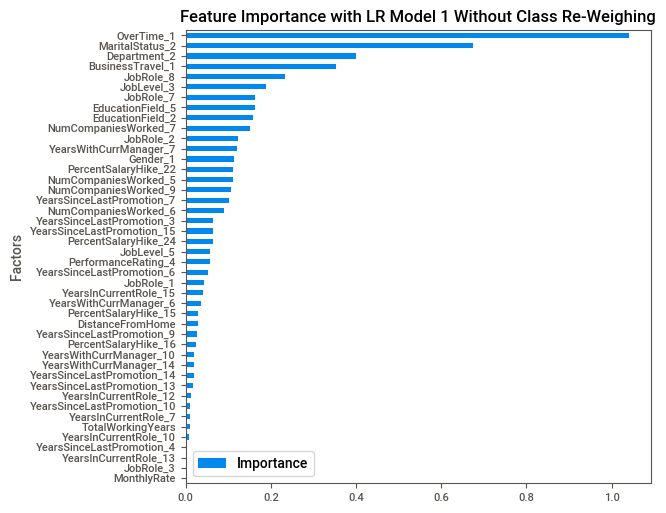

In [32]:
#Running the Model...Call Method to 'Build LR Without Adjusted Class Weights'
lr_preds, lr_model = build_op_lr(X_train, y_train, X_test, best_params=None) # Call Method to 'Build Logistic Regression WITH Class Weights'
lr_results = evaluate(y_test, lr_preds, eval_type="Log Reg")
lr_results["Factors"] = 'LR1_features_df'
#print(lr_results)

# Get Factors Contributing to Attrition
lr1_features = lr_model.coef_[0]##Logistic regression does not have an attribute for ranking feature so we cannot use feature importance function above

# Convert to Series and Plot Features
LR1_features = pd.Series(lr1_features, index=X.columns) # Attach Importance to data before split

# Get Features into Dataframe
LR1_features_df = LR1_features.to_frame()
LR1_features_df.reset_index(inplace=True)# Reset index before copying index to new column
LR1_features_df = LR1_features_df.rename(columns = {'index':'Factors', 0: 'Importance'}).sort_values(by=['Importance'],ascending=True)
LR1_features_df = LR1_features_df[LR1_features_df['Importance'] > 0] # Filter Features with Negative Correlation

# Plot Features
LR1_features_df.set_index('Factors', inplace=True)
LR1_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with LR Model 1 Without Class Re-Weighing')

# Merge Description to Encoded Features/Factors
LR1_features_df = LR1_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
LR1_features_df = pd.merge(LR1_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
LR1_features_df['Description'] = np.where(LR1_features_df['Description'] == '/', LR1_features_df['Factors'], LR1_features_df['Description'])
LR1_features_df['Description'] = LR1_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
LR1_features_df = LR1_features_df.drop(columns=[col for col in LR1_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-info">
<H4>
LR Model 2 WITH Auto-Hypertuned Class Reweighing
</H4></div>

{'type': 'LogReg Opt', 'accuracy': 0.7891156462585034, 'recall': 0.6808510638297872, 'precision': 0.4050632911392405, 'fscore': 0.6634768740031898, 'auc': 0.7452838315100354, 'Factors': 'LR2_features_df'}


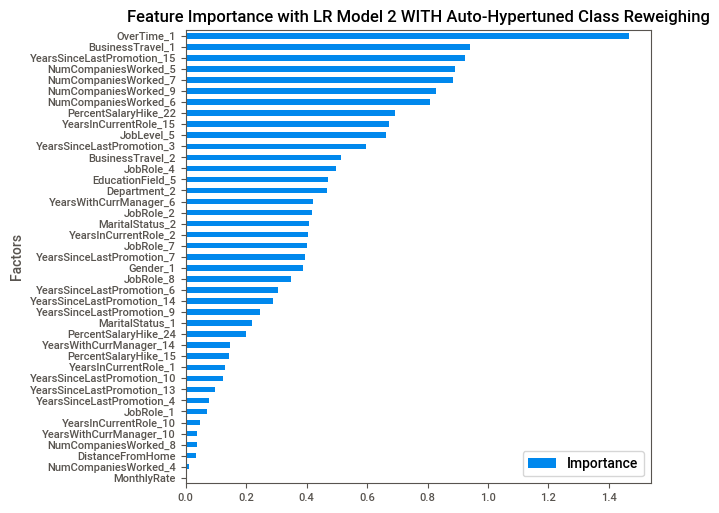

In [33]:
#Running the Model...Call Method to 'Build LR With Optimal Class Weights'
op_lr_preds, op_lr_model = build_op_lr(X_train, y_train, X_test, best_params=optimal_lr_params) # Call Method to 'Build Logistic Regression WITH Class Weights'
op_lr_results = evaluate(y_test, op_lr_preds, eval_type="LogReg Opt")
op_lr_results["Factors"] = 'LR2_features_df'
print(op_lr_results)

# Get Factors Contributing to Attrition
lr2_features = op_lr_model.coef_[0]##Logistic regression does not have an attribute for ranking feature so we cannot use feature importance function above

# Convert to Series and Plot Features
LR2_features = pd.Series(lr2_features, index=X.columns) # Attach Importance to data before split

# Get Features into Dataframe
LR2_features_df = LR2_features.to_frame()
LR2_features_df.reset_index(inplace=True)# Reset index before copying index to new column
LR2_features_df = LR2_features_df.rename(columns = {'index':'Factors', 0: 'Importance'}).sort_values(by=['Importance'],ascending=True)
LR2_features_df = LR2_features_df[LR2_features_df['Importance'] > 0] # Filter Features with Negative Correlation

# Plot Features
LR2_features_df.set_index('Factors', inplace=True)
LR2_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with LR Model 2 WITH Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
LR2_features_df = LR2_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
LR2_features_df = pd.merge(LR2_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
LR2_features_df['Description'] = np.where(LR2_features_df['Description'] == '/', LR2_features_df['Factors'], LR2_features_df['Description'])
LR2_features_df['Description'] = LR2_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
LR2_features_df = LR2_features_df.drop(columns=[col for col in LR2_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-danger">
<H2>   
Random Forest (RF) Models
</H2></div>

<div class="alert alert-block alert-success">
<H4>
Grid Search Method to Find 'Best Parameters'to 'Build Random Forest WITH Class Weights'
</H4></div>

In [34]:
# Method for Grid Search Hyperparameters for a Random Forest Model
def grid_search_rf(X_train, y_train):
    # Parameters
    params_grid = {
    'max_depth': [2*n+1 for n in range(10) ], #[5, 10, 15, 20],
    'n_estimators': [2*n+1 for n in range(20)], #[25, 50, 100],
    'min_samples_split': [2, 5],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    # RF Model
    rf_model = RandomForestClassifier(random_state=rs)
    
    # Search Best Parameters
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    # Train Model with Best Parameters
    grid_search.fit(X_train, y_train)
    
    # Get Best/optimal parameters
    best_params = grid_search.best_params_
    #Best_Score = grid_search.best_score_
    #accuracy = get_accuracy(X_train, X_test, y_train, y_test, grid_search.best_estimator_)
    return best_params

<div class="alert alert-block alert-warning">
<H4>
Get `Optimal Parameters` for RF Model using Grid Search RF Method above
</H4></div>

In [ ]:
#Calculate StartTime to Measure Script Execution Time at the End of Script
start_time = datetime.now()

#Get Optimal Parameters for RF Model using "grid_search_rf" Method to Find 'Best/Optimal Parameters'
best_params = grid_search_rf(X_train, y_train) # From the cell above, Call grid_search_rf(X_train, y_train)

best_params_df = pd.DataFrame([best_params]) # Dictionary To dataframe
print(best_params_df)

# Make Optimal Parameter Variables
optimal_class_weight = (best_params_df.at[0,'class_weight'])
print(optimal_class_weight)
optimal_max_depth = (best_params_df.at[0,'max_depth'])
print(optimal_max_depth)
optimal_min_samples_split = (best_params_df.at[0,'min_samples_split'])
print(optimal_min_samples_split)
optimal_n_estimators = (best_params_df.at[0,'n_estimators'])
print(optimal_n_estimators)

# Define Optimal Parameters
optimal_rf_params = {'bootstrap': True,
                         'class_weight': optimal_class_weight, 
                         'max_depth': optimal_max_depth, 
                         'min_samples_split': optimal_min_samples_split, 
                         'n_estimators': optimal_n_estimators}
print(optimal_rf_params)

#Print Total Execution Time
print('Model Execution Time: ', datetime.now() - start_time)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


<div class="alert alert-block alert-success">
<H4>
Method to 'Build  Random Forest WITH or WITHOUT Class Weights'
</H4></div>

In [ ]:
def build_op_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):  
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = True, # False if Bootstaping is being kept as None
                                   # Max depth of each tree
                                   max_depth = optimal_rf_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=optimal_rf_params['class_weight'],
                                   # Number of trees
                                   n_estimators=optimal_rf_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=optimal_rf_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

<div class="alert alert-block alert-info">
<H4>
RF Model 1 Without `Class Re-Weighing`
</H4></div>

In [ ]:
#Running the Model...Call Method to 'Build Simple Random Forest Without Class Weights'
preds, model = build_op_rf(X_train, y_train, X_test, best_params=None) # Call Method to 'Build Simple Random Forest Without Class Weights' 

#Collect Results
original_results = evaluate(y_test, preds, eval_type="RForest")
original_results["Factors"] = 'RF1_features_df'
print(original_results)

# Get Factors Contributing to Attrition in Dataframe
RF1_features_df = feature_importance(X, model)[:40]
RF1_features_df = RF1_features_df[RF1_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF1_features_df = RF1_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF1_drivers = [['Uses train test set to achieve best hypertuninge to resample data from train set to achieve balanced class.'],
               ['No optimal parameters were used.'], 
               ['Runs random forest model with above drivers to get top contributory features.']] # initialize list of lists
RF1_drivers = pd.DataFrame(RF1_drivers, columns=['Main Drivers behind RF1 model are as follows:']) # Create the pandas DataFrame
RF1_drivers.index = np.arange(1,len(RF1_drivers)+1)

# Plot Features
RF1_features_df.set_index('Factors', inplace=True)
RF1_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 1 Without `Class Re-Weighing`')

# Merge Description to Encoded Features/Factors
RF1_features_df = RF1_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF1_features_df = pd.merge(RF1_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
RF1_features_df['Description'] = np.where(RF1_features_df['Description'] == '/', RF1_features_df['Factors'], RF1_features_df['Description'])
RF1_features_df['Description'] = RF1_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF1_features_df = RF1_features_df.drop(columns=[col for col in RF1_features_df if col not in final_columns]) # Drop Columns if not in list


<div class="alert alert-block alert-info">
<H4>
RF Model 2 WITH Auto-Hypertuned Class Reweighing
</H4></div>

In [ ]:
#Running the Model...Call Method to 'Build Simple Random Forest With Class Weights'
op_preds, op_model = build_op_rf(X_train, y_train, X_test, best_params=optimal_rf_params) # Call Method to 'Build Simple Random Forest Without Class Weights' 

#Collect Results
print(original_results)
adjusted_results = evaluate(y_test, op_preds, eval_type="RForest Opt")
adjusted_results["Factors"] = 'RF2_features_df'
print(adjusted_results)

# Get Factors Contributing to Attrition in Dataframe
RF2_features_df = feature_importance(X, op_model)[:40]
RF2_features_df = RF2_features_df[RF2_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF2_features_df = RF2_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF2_drivers = [['Uses train test set to achieve best hypertuninge to resample data from train set to achieve balanced class'],
               ['Uses optimal parameters to achieve best hypertuning'],
               ['Runs random forest model with above drivers to get top contributory features']] # initialize list of lists
RF2_drivers = pd.DataFrame(RF2_drivers, columns=['Main Drivers behind RF2 model are as follows:']) # Create the pandas DataFrame
RF2_drivers.index = np.arange(1,len(RF2_drivers)+1)

# Plot Features
RF2_features_df.set_index('Factors', inplace=True)
RF2_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 2 WITH Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
RF2_features_df = RF2_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF2_features_df = pd.merge(RF2_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
RF2_features_df['Description'] = np.where(RF2_features_df['Description'] == '/', RF2_features_df['Factors'], RF2_features_df['Description'])
RF2_features_df['Description'] = RF2_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF2_features_df = RF2_features_df.drop(columns=[col for col in RF2_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-warning">
<H4>
For many machine learning tasks with imbalanced datasets, like customer/employee churn,  credit card fraud detection, <br>
<span style='color:blue'>we normally care more about </span> <span style='color:red'>recall</span> than <span style='color:green'>precision</span>.<br><br>
As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). <br>
On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening <br>

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.
</H4></div>

<div class="alert alert-block alert-danger">
<H2>
Synthetic Minority Oversampling Technique (SMOTE)
</H2></div>

<div class="alert alert-block alert-warning">
<H4>
SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance.<br>
Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.<br><br>

As a result, SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels.
<hr>
    
<span style='color:green'>** because the `imblearn` package provides us with many effective samplers including `SMOTE`, `RandomOverSampler`, and `RandomUnderSampler`.<br>**</span>

<span style='color:blue'>**1) Implement `imblearn` package `SMOTE` class**</span> to define <br>
* A SMOTE Sampler
* Resample Train Data
* Visualize Re-balanced Classes
</H4></div>

<div class="alert alert-block alert-success">
<H4>
Method for 'SMOTE Resampling' on Train Set
</H4></div>

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# X_smo is resampled from X_train using SMOTE
# y_smo is resampled from y_train using SMOTE
# X_under is resampled from X_train using Undersampling
# y_under is resampled from y_train using Undersampling
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = rs)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=rs)
    # Oversampling
    over_sampler = RandomUnderSampler(random_state=rs)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    X_over, y_over = over_sampler.fit_resample(X_train, y_train)
    # Visualize classes
    #y_smo.value_counts().plot.bar(color=['green', 'red'])
    return X_smo, y_smo, X_under, y_under, X_over, y_over
#y_smo.value_counts().plot.bar(color=['green', 'red'])

<div class="alert alert-block alert-warning">
<H4>
Create Resampled Training Datasets & Plot Class Re-Distribution:
</H4></div>

In [ ]:
X_smo, y_smo, X_under, y_under,  X_over, y_over = resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red'], figsize=(6, 4))

<div class="alert alert-block alert-info">
<H4>
RF Model 3 SMOTE Without Auto-Hypertuned Class Reweighing
</H4></div>

In [ ]:
smote_preds, smo_model = build_op_rf(X_smo, y_smo, X_test, best_params = None)
smote_results = evaluate(y_test, smote_preds, eval_type="RForest Smo")
smote_results["Factors"] = 'RF3_features_df'# Add Important Factors to Dictionary
print(original_results)
print(adjusted_results)
print(smote_results)

# Get Factors Contributing to Attrition in Dataframe
RF3_features_df = feature_importance(X, smo_model)[:40]
RF3_features_df = RF3_features_df[RF3_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF3_features_df = RF3_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF3_drivers = [['Uses smot parameters to resample data from train set to achieve balanced class'],
               ['Runs random forest model without optimal parameters with above drivers to get top contributory features']] # initialize list of lists
RF3_drivers = pd.DataFrame(RF3_drivers, columns=['Main Drivers behind RF4 model are as follows:']) # Create the pandas DataFrame
RF3_drivers.index = np.arange(1,len(RF3_drivers)+1)

# Plot Features
RF3_features_df.set_index('Factors', inplace=True)
RF3_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 3 SMOTE Without Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
RF3_features_df = RF3_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF3_features_df = pd.merge(RF3_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
RF3_features_df['Description'] = np.where(RF3_features_df['Description'] == '/', RF3_features_df['Factors'], RF3_features_df['Description'])
RF3_features_df['Description'] = RF3_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF3_features_df = RF3_features_df.drop(columns=[col for col in RF3_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-info">
<H4>
RF Model 4 SMOTE WITH Auto-Hypertuned Class Reweighing
</H4></div>

In [ ]:
op_smote_preds, op_smo_model = build_op_rf(X_smo, y_smo, X_test, best_params=optimal_rf_params)
op_smote_results = evaluate(y_test, op_smote_preds, eval_type="RForest Opt Smote")
op_smote_results["Factors"] = 'RF4_features_df'# Add Important Factors to Dictionary
print(original_results)
print(adjusted_results)
print(smote_results)
print(op_smote_results)

# Get Factors Contributing to Attrition in Dataframe
RF4_features_df = feature_importance(X, op_smo_model)[:40]
RF4_features_df = RF4_features_df[RF4_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF4_features_df = RF4_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF4_drivers = [['Uses smot parameters to achieve best hypertuninge to resample data from train set to achieve balanced class'],
               ['Uses optimal parameters to achieve best hypertuning'], 
               ['Runs random forest model with above drivers to get top contributory features']] # initialize list of lists
RF4_drivers = pd.DataFrame(RF4_drivers, columns=['Main Drivers behind RF4 model are as follows:']) # Create the pandas DataFrame
RF4_drivers.index = np.arange(1,len(RF4_drivers)+1)

# Plot Features
RF4_features_df.set_index('Factors', inplace=True)
RF4_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 4 SMOTE WITH Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
RF4_features_df = RF4_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF4_features_df = pd.merge(RF4_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
RF4_features_df['Description'] = np.where(RF4_features_df['Description'] == '/', RF4_features_df['Factors'], RF4_features_df['Description'])
RF4_features_df['Description'] = RF4_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF4_features_df = RF4_features_df.drop(columns=[col for col in RF4_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-info">
<H4>
RF Model 5 UNDER SAMPLING WITH Auto-Hypertuned Class Reweighing
</H4></div>

In [ ]:
under_preds, under_model = build_op_rf(X_under, y_under, X_test, best_params=optimal_rf_params)
under_results = evaluate(y_test, under_preds, eval_type="RForest Opt Under")
under_results["Factors"] = 'RF5_features_df'# Add Important Factors to Dictionary
print(original_results)
print(adjusted_results)
print(smote_results)
print(op_smote_results)
print(under_results)

# Get Factors Contributing to Attrition in Dataframe
RF5_features_df = feature_importance(X, under_model)[:40]
RF5_features_df = RF5_features_df[RF5_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF5_features_df = RF5_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF5_drivers = [['Uses undersampling to delete examples from majority class in order to achieve balance among classes'],
               ['Uses cv grid method to find optimal parameters to achieve best hypertuning'], 
               ['Runs random forest model with above drivers to get top contributory features']] # initialize list of lists
RF5_drivers = pd.DataFrame(RF5_drivers, columns=['Main Drivers behind RF5 model are as follows:']) # Create the pandas DataFrame
RF5_drivers.index = np.arange(1,len(RF5_drivers)+1)

# Plot Features
RF5_features_df.set_index('Factors', inplace=True)
RF5_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 5 UNDER SAMPLING WITH Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
RF5_features_df = RF5_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF5_features_df = pd.merge(RF5_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "/") # Merge Data
RF5_features_df['Description'] = np.where(RF5_features_df['Description'] == '/', RF5_features_df['Factors'], RF5_features_df['Description'])
RF5_features_df['Description'] = RF5_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF5_features_df = RF5_features_df.drop(columns=[col for col in RF5_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-info">
<H4>
RF Model 6 OVER SAMPLING WITHOUT Auto-Hypertuned Class Reweighing
</H4></div>

In [ ]:
over_preds, over_model = build_op_rf(X_over, y_over, X_test, best_params=None)
over_results = evaluate(y_test, over_preds, eval_type="RForest Over")
over_results["Factors"] = 'RF6_features_df'# Add Important Factors to Dictionary
print(original_results)
print(adjusted_results)
print(smote_results)
print(op_smote_results)
print(under_results)
print(over_results)

# Get Factors Contributing to Attrition in Dataframe
RF6_features_df = feature_importance(X, over_model)[:40]
RF6_features_df = RF6_features_df[RF6_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF6_features_df = RF6_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF6_drivers = [['Uses oversampling to randomly selected examples from majority class in order to achieve balance among classes'],
               ['Runs random forest model with above drivers to get top contributory features']] # initialize list of lists
RF6_drivers = pd.DataFrame(RF6_drivers, columns=['Main Drivers behind RF6 model are as follows:']) # Create the pandas DataFrame
RF6_drivers.index = np.arange(1,len(RF6_drivers)+1)

# Plot Features
RF6_features_df.set_index('Factors', inplace=True)
RF6_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with RF Model 6 OVER SAMPLING WITHOUT Auto-Hypertuned Class Reweighing')

# Merge Description to Encoded Features/Factors
RF6_features_df = RF6_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
RF6_features_df = pd.merge(RF6_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
RF6_features_df['Description'] = np.where(RF6_features_df['Description'] == '/', RF6_features_df['Factors'], RF6_features_df['Description'])
RF6_features_df['Description'] = RF6_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF6_features_df = RF6_features_df.drop(columns=[col for col in RF6_features_df if col not in final_columns]) # Drop Columns if not in list

<div class="alert alert-block alert-danger">
<H2>   
eXtreme Gradient Boosting (XGB) Model
</H2></div>
<div class="alert alert-block alert-success">
<H4>
Grid Search Method to Find 'Best Parameters'to 'Build XGB WITH Best Class Weights'
</H4></div>

In [ ]:
#Calculate StartTime to Measure Model Execution Time at the End
xgb_start_time = datetime.now()

# Method for Grid Search Hyperparameters for a Random Forest Model
def grid_search_xgb(X_train, y_train):
    # Parameters
    params_grid = {
    'max_depth': [5, 10, 15, 20], #[2*n+1 for n in range(10) ], 
    'n_estimators': [100, 300, 500],#[2*n+1 for n in range(20)], 
    'min_samples_split': [2, 5, 8],
    }
    # RF Model
    xgb_model = GradientBoostingClassifier(random_state=rs)
    
    # Search Best Parameters
    grid_search = GridSearchCV(estimator = xgb_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    # Train Model with Best Parameters
    grid_search.fit(X_train, y_train)
    
    # Get Best/optimal parameters
    best_params = grid_search.best_params_
    return best_params

<div class="alert alert-block alert-warning">
<H4>
Get `Optimal Parameters` for XGB Model using Grid Search XGB Method above
</H4></div>

In [ ]:
xgb_params = grid_search_xgb(X_train, y_train) # From the cell above, Call grid_search_xgb(X_train, y_train)

In [ ]:
xgb_params_df = pd.DataFrame([xgb_params]) # Dictionary To dataframe
print(xgb_params_df)

# Make Optimal Parameter Variables
xgb_opt_max_depth = (xgb_params_df.at[0,'max_depth'])
print(xgb_opt_max_depth)
xgb_opt_min_samples_split = (xgb_params_df.at[0,'min_samples_split'])
print(xgb_opt_min_samples_split)
xgb_opt_n_estimators = (xgb_params_df.at[0,'n_estimators'])
print(xgb_opt_n_estimators)

# Define Optimal Parameters
xgb_optimal_params = {#'bootstrap': True,
                         #'class_weight': xgb_opt_class_weight, 
                         'max_depth': xgb_opt_max_depth, 
                         'min_samples_split': xgb_opt_min_samples_split, 
                         'n_estimators': xgb_opt_n_estimators}
print(xgb_optimal_params)

<div class="alert alert-block alert-success">
<H4>
Method to 'Build  XGB WITH or WITHOUT Class Weights'
</H4></div>

In [ ]:
def build_xgb(X_train, y_train, X_test, threshold=0.5, best_params=None):  
    xgb_model = GradientBoostingClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        xgb_model = GradientBoostingClassifier(random_state = rs,
                                   # Max depth of each tree
                                   max_depth = xgb_optimal_params['max_depth'],
                                   # Class weight parameters
                                   #class_weight=optimal_params['class_weight'],
                                   # Number of trees
                                   n_estimators=xgb_optimal_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=xgb_optimal_params['min_samples_split'])
    # Train the model   
    xgb_model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = xgb_model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, xgb_model

<div class="alert alert-block alert-info">
<H4>
XGB Model 8 WITH Auto-Hypertuned PARAMETERS
</H4></div>

In [ ]:
xgb_preds, xgb_model = build_xgb(X_train,y_train, X_test, best_params=xgb_optimal_params)
xgb_results = evaluate(y_test, xgb_preds, eval_type="XGB Opt")
xgb_results["Factors"] = 'XGB_features_df'# Add Important Factors to Dictionary
print(original_results)
print(adjusted_results)
print(smote_results)
print(op_smote_results)
print(under_results)
print(xgb_results)

# Get Factors Contributing to Attrition in Dataframe
XGB_features_df = feature_importance(X, xgb_model)[:40]
XGB_features_df = XGB_features_df[XGB_features_df['Importance'] > 0] # Filter Features with Negative Correlation
XGB_features_df = XGB_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
XGB_drivers = [['Uses cv grid method to find optimal parameters to achieve best hypertuning'],
               ['Uses train test and optimal parameters to achieve right balance among classes'],
               ['Runs XGB model with above drivers to get top contributory features']] # initialize list of lists
XGB_drivers = pd.DataFrame(XGB_drivers, columns=['Main Drivers behind RF6 model are as follows:']) # Create the pandas DataFrame
XGB_drivers.index = np.arange(1,len(XGB_drivers)+1)

# Plot Features
XGB_features_df.set_index('Factors', inplace=True)
XGB_features_df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance with XGB Model 8 WITH Auto-Hypertuned PARAMETERS')

# Merge Description to Encoded Features/Factors
XGB_features_df = XGB_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
XGB_features_df = pd.merge(XGB_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
XGB_features_df['Description'] = np.where(XGB_features_df['Description'] == '/', XGB_features_df['Factors'], XGB_features_df['Description'])
XGB_features_df['Description'] = XGB_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
XGB_features_df = XGB_features_df.drop(columns=[col for col in XGB_features_df if col not in final_columns]) # Drop Columns if not in list

# Get Model Execution Time
print('XGB Model Execution Time: ', datetime.now() - xgb_start_time)

<div class="alert alert-block alert-info">
<H3>
Summarize Results
</H3></div>

<div class="alert alert-block alert-warning">
<H4>   
<span style='color:Indigo'> 1. Summarize Results in Dataframe </span>
</H4></div>

In [ ]:
results = []
results.append(original_results)
results.append(adjusted_results)
results.append(smote_results)
results.append(op_smote_results)
results.append(lr_results)
results.append(op_lr_results)
results.append(under_results)
results.append(over_results)
results.append(xgb_results)
#print(results)
#print(type(results))
#results_df=pd.DataFrame.from_dict(results, orient='index')
result= pd.DataFrame(results[0:],columns=results[0])
result = result.sort_values(by=['recall', 'accuracy'], ascending=False)
result = result.reset_index(drop=True)


print(colored("5) Recommended Model:", 'magenta', attrs=['bold'])
      + colored("\n\nResult Summary is given below:\n", 'blue', attrs=['bold'])
      + colored(result.iloc[:10, 0:5], 'red', attrs=['bold'])
      + colored("\n\nFor many machine learning tasks with imbalanced datasets, like Employee Attrition, we normally care more about Recall  ", 'green', attrs=['bold'])
      + colored("\nthan precision.. As a baseline, we want the model to be able to find all possible factors and so, we would allow the", 'green', attrs=['bold'])
      + colored("\nmodel to make false-positive errors because the cost of false positives is usually not very high (maybe it will just costs ", 'green', attrs=['bold'])
      + colored("\na false notification email or phone call to confirm with employee). ", 'green', attrs=['bold'])
      + colored("\n\nOn the other hand, failing to recognize positive examples (such as employee wanting to leave) can be too costly for the", 'green', attrs=['bold'])
      + colored("\nfor the oganization. As such, our first priority is to improve model's recall; then we will also want to keep precision as high as possible.", 'green', attrs=['bold'])
      + colored("\n\nIn this case, the Model with Best Recall and F-Score is ", 'green', attrs=['bold'])
      + colored(result.iloc[0,0], 'blue', attrs=['bold'])
      +colored(".\n\nHence, we will select this model for Employee Attrition Prediction.", 'magenta', attrs=['bold'])
     )

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 2. Visualize Model Evaluation Summary as Bar Chart </span>
</H4></div>

In [ ]:
chart = result.set_index('type')
#print(chart)
print(colored("                            Chart Values\n ", 'green', attrs=['bold'])
      + colored(chart.iloc[0:, 0:6], 'magenta', attrs=['bold'])
      +colored("\n\n                       Model Evaluation Summary as Bar Chart\n ", 'green', attrs=['bold'])
     )
ax = chart.plot.bar(rot=0, figsize=(14, 4)) #pandas bar chart

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 3. Visualize Result Metrics Summary as Individual Bar Charts </span>
</H4></div>

In [ ]:
axes = chart.plot.bar(rot=0, subplots=True, figsize=(16, 8))
axes[1].legend(loc=2) 

In [ ]:
print(result)

model = (result.iloc[0,0])
print(model)
if model == 'Log Reg':
    feature_list = df_sub_copy = LR1_features_df[0:].copy()
    feature_list

<span style='color:Indigo; font-weight:bold'> 6) Summary Key Findings and Insights:<br>
6a) Main drivers of your model and <br>
6b) Insights from your data derived from your classifier model.
</span>

<div class="alert alert-block alert-warning">
<H4>
<span style='color:Indigo'> 1. Logic to Pick Best Model: </span>
</H4></div>

In [ ]:
print(colored("\nTop Drivers behind Selected Model are as follows: \n", 'blue', attrs=['bold'])
     )
if model == 'Log Reg':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(LR1_drivers,'red', attrs=['bold']))
elif model == 'LogReg Opt':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(LR2_drivers,'red', attrs=['bold']))
elif model == 'RForest':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF1_drivers,'red', attrs=['bold']))
elif model == 'RForest Opt':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF2_drivers,'red', attrs=['bold']))
elif model == 'RForest Smo':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF3_drivers,'red', attrs=['bold']))
elif model == 'RForest Opt Smote':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF4_drivers,'red', attrs=['bold']))
elif model == 'RForest Opt Under':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF5_drivers,'red', attrs=['bold']))
elif model == 'RForest Over':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(RF6_drivers,'red', attrs=['bold']))
elif model == 'XGB Opt':
    print(colored("Summarizing Model Drivers:\n", 'green', attrs=['bold'])
    + colored(XGB_drivers,'red', attrs=['bold']))
    
############## TOP FACTORS ##############
print(colored("\nTop Factors Contributing to Employee Attrition in order of Importance are as follows: \n", 'blue', attrs=['bold'])
     )
if model == 'Log Reg':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(LR1_features_df,'red', attrs=['bold']))
elif model == 'LogReg Opt':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(LR2_features_df,'red', attrs=['bold']))
elif model == 'RForest':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF1_features_df,'red', attrs=['bold']))
elif model == 'RForest Opt':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF2_features_df,'red', attrs=['bold']))
elif model == 'RForest Smo':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF3_features_df,'red', attrs=['bold']))
elif model == 'RForest Opt Smote':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF4_features_df,'red', attrs=['bold']))
elif model == 'RForest Opt Under':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF5_features_df,'red', attrs=['bold']))
elif model == 'RForest Over':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(RF6_features_df,'red', attrs=['bold']))
elif model == 'XGB Opt':
    print(colored("                       Top Contributory Factors:\n", 'green', attrs=['bold'])
    + colored(XGB_features_df,'red', attrs=['bold']))

############## PLOT TOP FACTORS ##############

fig1 = plt.figure(facecolor='yellow')
print(colored("\nTop Factors Contributing to Employee Attrition in Ascending Order of Importance are as follows: \n", 'blue', attrs=['bold'])
     )
if model == 'Log Reg':
    fig1 = LR1_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'LogReg Opt':
    fig1 = LR2_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest':
    fig1 = RF1_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest Opt':
    fig1 = RF2_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest Smo':
    fig1 = RF3_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest Opt Smote':
    fig1 = RF4_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest Opt Under':
    fig1 = RF5_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'RForest Over':
    fig1 = RF6_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
elif model == 'XGB Opt':
    fig1 = XGB_features_df.plot(kind='barh', x= 'Description', y='Importance',figsize=(6, 6), color = 'red')
################################################

fig1 = plt.title('Summarizing Contributory Factors to Employee Attrition')


<div class="alert alert-block alert-danger">
<H4>
Get Script End Time
</H4></div>

In [ ]:
#Print Total Execution Time
print('Script Took ', datetime.now() - script_start_time, ' Minutes.')

<div class="alert alert-block alert-danger">
<H4>   
<span style='color:blue; font-weight:bold'>Other Models for Reference:<br><br></span>
<span style = 'color:Indigo; font-weight:bold'>
1) https://github.com/IBM/employee-attrition-aif360/blob/master/notebooks/employee-attrition.ipynb <br><br>
2) https://github.com/JNYH/employee_attrition/blob/master/employee_attrition.ipynb <br><br>
3) https://github.com/elastic/examples/tree/master/Machine%20Learning/Analytics%20Jupyter%20Notebooks <br><br>
4) https://github.com/ganesh10-india/HR_Analytics-Employee_Attrition-Classification-Models/blob/main/HR_Analytics_Employee_Attrition_Classification_Models.ipynb <br>
</span>
</H4></div>